### KoNLPy
* NLTK는 영어 정보처리를 위한 패키지
* 반면, KoNLPy는 한국어 정보처리를 위한 패키지
* 이미 개발된 한글 형태소 분석기를 파이썬에서도 사용할 수 있도록 해주는 도우미 패키지
    + hannannum, Kkma, Komoran, mecab, Okt(twitter)
* https://konlpy.org/ko/latest/
* pip install tweepy==3.10.0
* pip install konlpy

In [27]:
import konlpy
from konlpy.tag import Okt

In [28]:
# 트위터 형태소 사전을 사용하기 위한 초기화
twitter = Okt()

In [29]:
txt1 = '아버지가방에들어가신다'
txt2 = '아버지가 방에 들어가신다'
txt3 = '또 올라? 치킨이 2만원... 소비자에 비용상승 전가'

In [30]:
# 형태소 분석 : pos(객체명)
twitter.pos(txt1)
twitter.pos(txt2)
twitter.pos(txt3)

[('또', 'Noun'),
 ('올라', 'Verb'),
 ('?', 'Punctuation'),
 ('치킨', 'Noun'),
 ('이', 'Josa'),
 ('2만원', 'Number'),
 ('...', 'Punctuation'),
 ('소비자', 'Noun'),
 ('에', 'Josa'),
 ('비용', 'Noun'),
 ('상승', 'Noun'),
 ('전가', 'Noun')]

In [31]:
# 형태소 상세 분석 (어간추출stemming) : morphs(객체명, stem=True)
# 각 단어의 원형을 추출해서 출력
twitter.morphs(txt1, stem=True)
twitter.morphs(txt2, stem=True)
twitter.morphs(txt3, stem=True)

['또', '오르다', '?', '치킨', '이', '2만원', '...', '소비자', '에', '비용', '상승', '전가']

In [32]:
# 명사추출 : nouns(객체명)
twitter.nouns(txt1)
twitter.nouns(txt2)
twitter.nouns(txt3)

['또', '치킨', '소비자', '비용', '상승', '전가']

In [33]:
# konlpy 내장 한국어 말뭉치
# 대한민국 헌법 말뭉치 : kolaw
# 국회법안 말뭉치 : kobill
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [34]:
kolaw.fileids() # 말뭉치 파일명 출력
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [35]:
# 내장 말뭉치 확인
docs = kolaw.open('constitution.txt').read()
docs[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [36]:
# 대한민국 헌법 말뭉치에서 자주 언급되는 단어 분석
from collections import Counter

In [37]:
words = twitter.pos(docs) # 형태소 중 명사만 출력
words[:10]

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb')]

In [38]:
wc = Counter(words) # 단어별 빈도 분석
wc.most_common(25)

[(('의', 'Josa'), 372),
 (('.', 'Punctuation'), 357),
 (('에', 'Josa'), 281),
 (('을', 'Josa'), 208),
 (('\n', 'Foreign'), 195),
 (('은', 'Josa'), 179),
 (('제', 'Noun'), 175),
 (('한다', 'Verb'), 155),
 (('·', 'Punctuation'), 145),
 (('이', 'Josa'), 137),
 (('\n  ', 'Foreign'), 130),
 (('를', 'Josa'), 129),
 (('법률', 'Noun'), 127),
 (('는', 'Josa'), 119),
 ((',', 'Punctuation'), 101),
 (('할', 'Verb'), 100),
 (('한', 'Josa'), 93),
 (('정', 'Noun'), 89),
 (('수', 'Noun'), 88),
 (('대통령', 'Noun'), 83),
 (('과', 'Josa'), 81),
 (('①', 'Foreign'), 78),
 (('②', 'Foreign'), 78),
 (('국가', 'Noun'), 73),
 (('또는', 'Adverb'), 70)]

In [40]:
# 추출된 명사에서 2자이상만을 다시 추출해서 단어 빈도를 분석함
tokens = twitter.nouns(docs)
words = [ t for t in tokens if len(t) >= 2 ]

In [102]:
wc = Counter(words)
wc.most_common(25)

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18),
 ('국회의원', 18),
 ('임기', 18),
 ('의결', 17),
 ('공무원', 17),
 ('경우', 17)]

In [103]:
# 대한민국 헌법 말뭉치를 이용해서 
# 워드클라우드로 시각화
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [104]:
wcc = dict(wc.most_common())

In [105]:
korfont = '/usr/shar/fonts/NanumGothic.ttf'

(-0.5, 639.5, 399.5, -0.5)

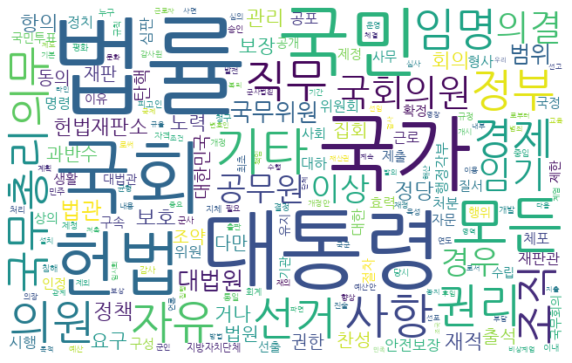

In [106]:
wcimg = WordCloud(background_color='white', width=640, height=400, font_path=korfont).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')

In [109]:
# 트럼프 국회연설문을 워드클라우드로 시각화
docs1 = []
with open('trump_ko.txt') as f:
    docs1 = f.read()
docs1[:100]

'정세균 의장님, 존경하는 국회의원 여러분, 내외귀빈 여러분.\n\n미국 국민을 대표해 이 곳 국회 본회의장에서 대한민국 국민들께 연설할 수 있는 특별한 영광을 주셔서 감사합니다.\n\n한'

In [110]:
nonus1 = twitter.nouns(docs1)
words1 = [ n for n in nonus1 if len(n) >= 2 ]

In [111]:
wc = Counter(words1)
wcc = dict(wc.most_common())

(-0.5, 639.5, 399.5, -0.5)

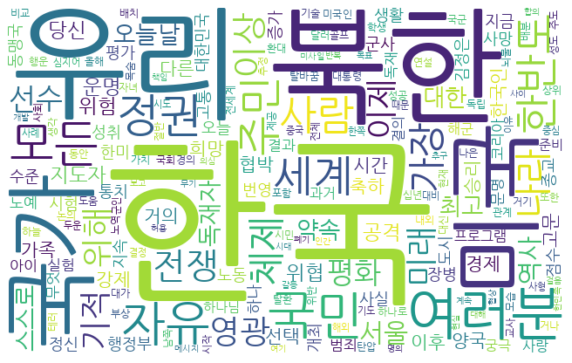

In [114]:
wcimg = WordCloud(background_color='white', width=640, height=400, font_path=korfont).generate_from_frequencies(wcc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')

In [115]:
# 스티브잡스 졸업축사를 워드 클라우드로 시각화
docs2 = []
with open('stevejobs_ko.txt') as f:
    docs2 = f.read()
docs2[:100]

'오늘 세계 최고 대학 중 한 곳의 졸업식에 참석하게 되어 영광입니다. 나는 대학을 졸업한 적이 없습니다. 솔직히 오늘이 대학 졸업식에 가장 근접해본 것입니다. 오늘 저는 내 인생의'

In [116]:
nonus2 = twitter.nouns(docs2)
words2 = [ n for n in nonus2 if len(n) >= 2 ]

In [117]:
wc = Counter(words2)
wcc = dict(wc.most_common())

(-0.5, 639.5, 399.5, -0.5)

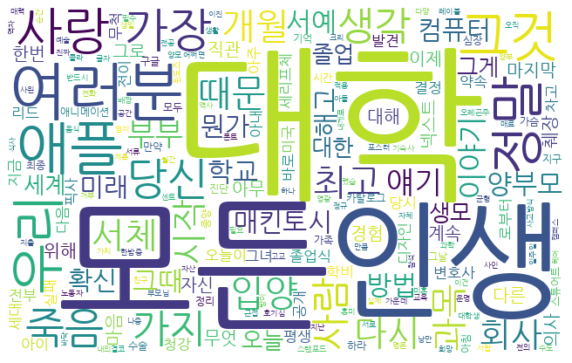

In [118]:
wcimg = WordCloud(background_color='white', width=640, height=400, font_path=korfont).generate_from_frequencies(wcc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')